<a href="https://colab.research.google.com/github/rahul080102/AICS/blob/main/AICS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("1665207545094_Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
X=df.drop(columns=["CustomerID", "Genre", "Age"], axis=1).values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


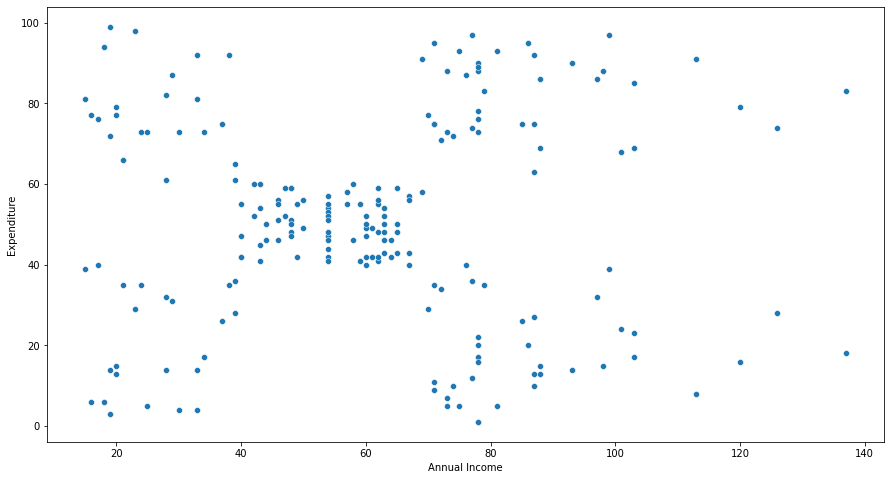

In [9]:
plt.figure(figsize=(15,8))
sns.scatterplot(X[:,0], X[:,1])
plt.xlabel("Annual Income")
plt.ylabel("Expenditure")
plt.show()

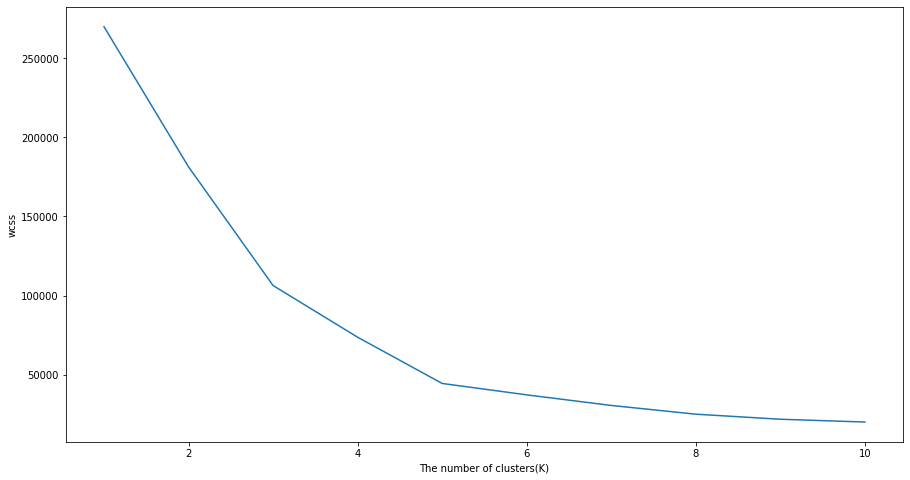

In [10]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init="k-means++", random_state=2)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11), wcss)
plt.xlabel("The number of clusters(K)")
plt.ylabel("wcss")
plt.show()

In [12]:
kmeans=KMeans(n_clusters=5, init="k-means++", random_state=0)
Y=kmeans.fit_predict(X)

In [13]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

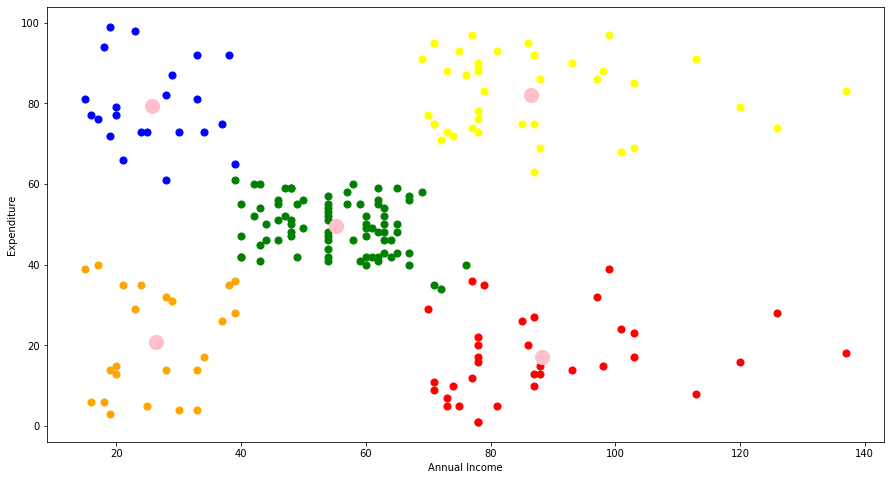

In [15]:
plt.figure(figsize=(15,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c="red", label="Cluster 1")
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c="green", label="Cluster 2")
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c="yellow", label="Cluster 3")
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c="blue", label="Cluster 4")
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c="orange", label="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c="pink", label="Cluster 6")
plt.xlabel("Annual Income")
plt.ylabel("Expenditure")
plt.show()